#### IMPORTING LIBRARIES

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE


### 1. READING  & UNDERSTANDING DATA

In [433]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Looking at the info() and shape of the data

In [434]:
bike.shape

(730, 16)

Data has 730 entries with 16 columns

In [435]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


It has not any null values in any of the columns

In [436]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can see that for the continuous features like temp, atemp, hum & windspeed; mean and median are pretty close which indicates no or very few outliers.

### 2. VISUALISING DATA

- **CATEGORICAL FEATURES**

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

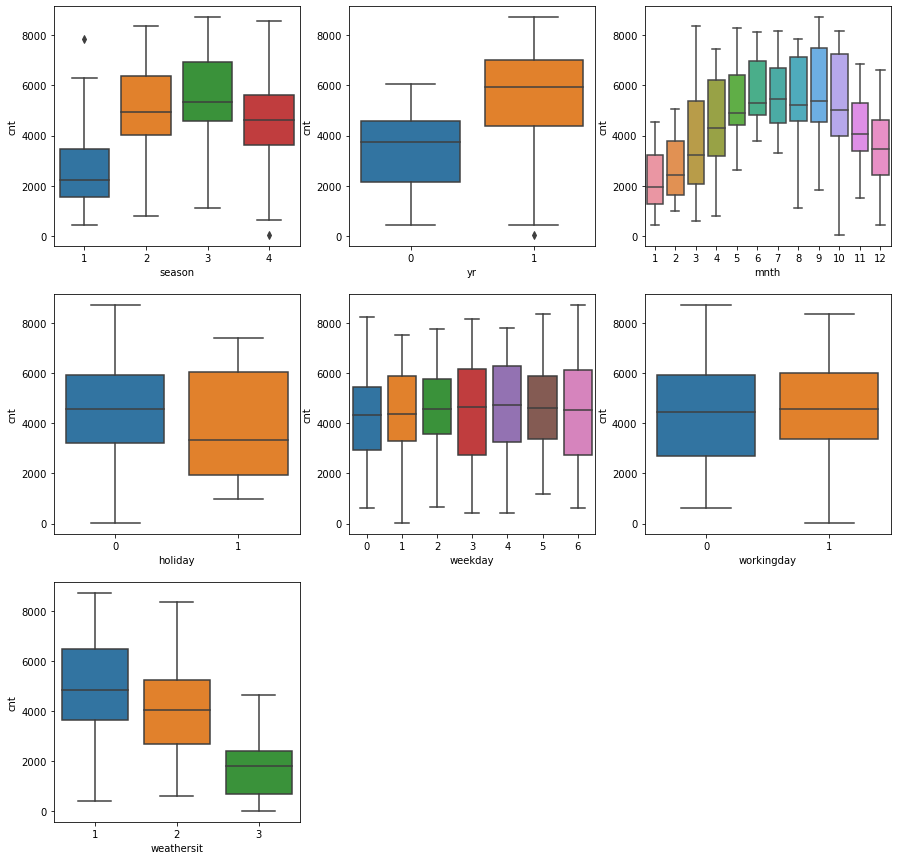

In [437]:
## For season, yr, mnth, holiday, weekday, workingday, weathersit

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike)

#### **OBSERVATIONS:**
- Season 1 i.e. Spring has the least number of demands, whereas in Fall demand is the highest.
- Year 2019 has seen increasing demands significantly.
- Month wise we see an increasing trend and then gradually decreasing at the end.
- Holidays have lesser bike sharing demands.
- There are no demand on weathersit 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog', whereas 1:'Clear,     Few clouds, Partly cloudy, Partly cloudy' has the highest.


- **NUMERICAL FEATURES**

             cnt   temp  atemp    hum  windspeed
cnt        1.000  0.627  0.631 -0.099     -0.235
temp       0.627  1.000  0.992  0.129     -0.158
atemp      0.631  0.992  1.000  0.142     -0.184
hum       -0.099  0.129  0.142  1.000     -0.249
windspeed -0.235 -0.158 -0.184 -0.249      1.000


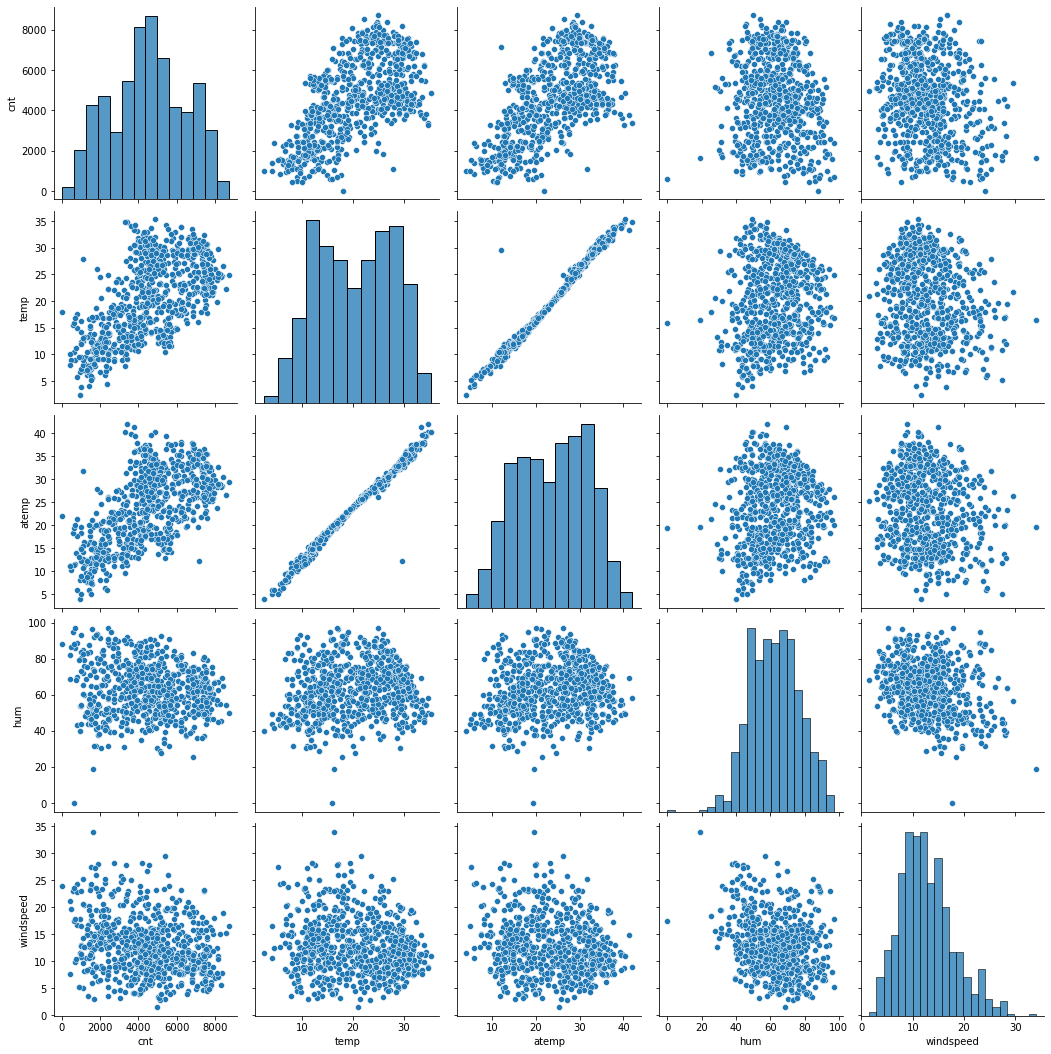

In [438]:
## For temp, atemp, hum & windspeed
print(bike[['cnt','temp', 'atemp', 'hum' , 'windspeed']].corr().round(3))
sns.pairplot(data=bike,vars=['cnt','temp', 'atemp', 'hum' , 'windspeed']).fig.set_size_inches(15,15)
plt.show()

We can see demand has a positive relation with temp and atemp

### 3. DATA PREPARATION

Dropping Irrelevant columns
- Columns 'instant' and 'dteday' can be dropped as they are irrelevant.
- Columns 'casual' and 'registered' are the part of output itself and wont be available if we get unseen data to         predict, hence can not be used in modelling.

In [439]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

Converting columns 'season','month','weekday' &'weathersit' into their categories so that we can create dummy variables for them.

In [440]:
# Season column
bike.season = bike.season.map({1:'spring',
                               2:'summer',
                               3:'fall',
                               4:'winter'})

In [441]:
# month column
bike.mnth = bike.mnth.map({1:'Jan',
                           2:'Feb',
                           3:'Mar',
                           4:'Apr',
                           5:'May',
                           6:'Jun',
                           7:'Jul',
                           8:'Aug',
                           9:'Sep',
                           10:'Oct',
                           11:'Nov',
                           12:'Dec'})

In [442]:
# weekday column
bike.weekday = bike.weekday.map({0:'W1',
                           1:'W2',
                           2:'W3',
                           3:'W4',
                           4:'W5',
                           5:'W6',
                           6:'W7'})

In [443]:
# Weathersit column
bike.weathersit = bike.weathersit.map({1:'Clear or cloudy',
                                       2:'Mist + Cloudy',
                                       3:'Light Snow/Rain + Thunderstorm + Scattered clouds',
                                       4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

#### DUMMY VARIABLES

In [444]:
dummy_vars = bike[['season','mnth','weekday','weathersit']]
dummies = pd.get_dummies(dummy_vars,drop_first=True)
bike = pd.concat([bike,dummies],axis=1)
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [445]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_W2,weekday_W3,weekday_W4,weekday_W5,weekday_W6,weekday_W7,weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


We have got finally 30 columns

#### SPLITTING INTO TRAIN & TEST DATA

In [446]:
train, test = train_test_split(bike,train_size=0.7,test_size=0.3,random_state = 100)

In [447]:
print(train.shape,test.shape)

(510, 30) (219, 30)


We have got 510 entries to train the data and 219 for test

#### SCALING

In [448]:
# We will use MinMax scaling
vars = ['cnt','temp', 'atemp', 'hum' , 'windspeed']
scaler = MinMaxScaler()
train[vars] = scaler.fit_transform(train[vars])
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_W2,weekday_W3,weekday_W4,weekday_W5,weekday_W6,weekday_W7,weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [449]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_W2,weekday_W3,weekday_W4,weekday_W5,weekday_W6,weekday_W7,weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see our all the variables are in range between 0 to 1, hence our dataset is ready for modelling. But lets just see the correlation between these variables

<AxesSubplot:>

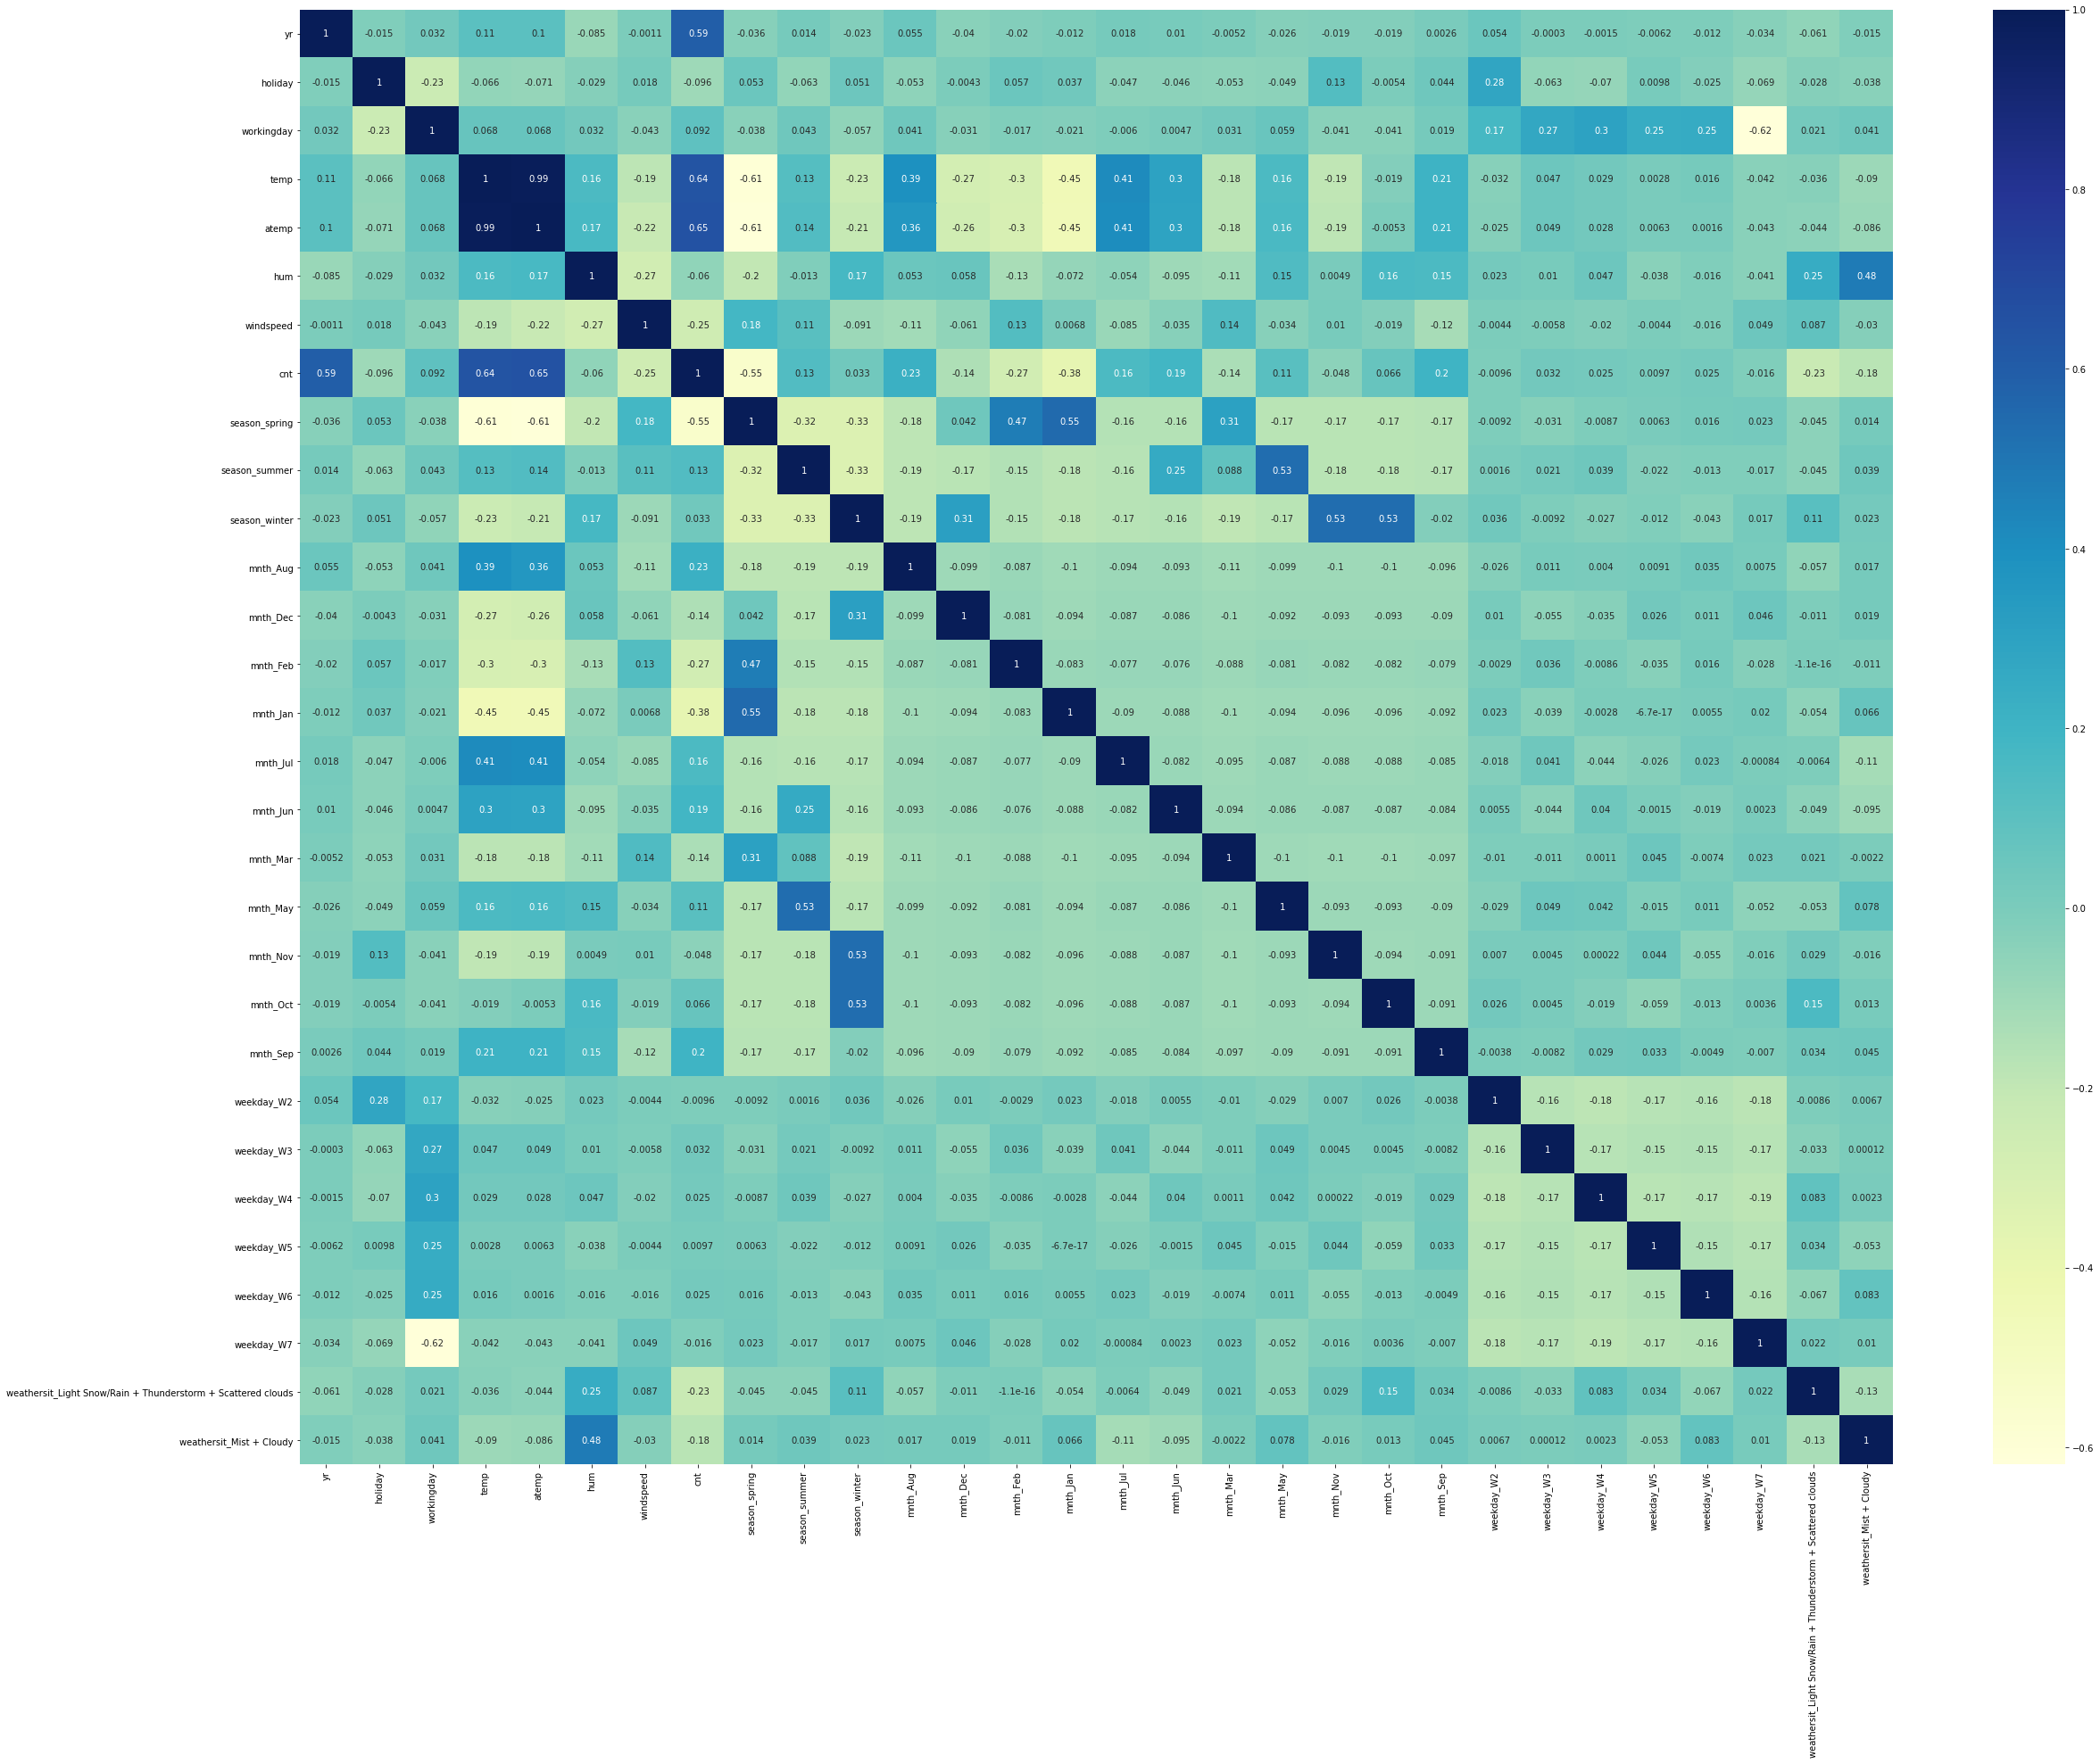

In [450]:
plt.figure(figsize=(40,30))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

We see the 'temp' and 'atemp' is highly correlated

In [451]:
train[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.989537
atemp,0.989537,1.000000


Correlation coefficient is 0.99 which is very very high and indicates these 2 features are highly correlated, hence we should drop one of them to avaoid multicollinearity.

In [452]:
train.drop('atemp',axis=1,inplace=True)

### 3. MODELLING 

In [453]:
# Dividing the training data into dependent adn independent variables
y_train = train.pop('cnt')
X_train = train

Now lets reduce the features to 15 from 28 by running RFE and then we can do manual tuning.

In [454]:
# RFE
lr = LinearRegression()
lr = lr.fit(X_train,y_train)

rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 7),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 6),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', False, 2),
 ('weekday_W2', True, 1),
 ('weekday_W3', True, 1),
 ('weekday_W4', True, 1),
 ('weekday_W5', True, 1),
 ('weekday_W6', True, 1),
 ('weekday_W7', False, 4),
 ('weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds', True, 1),
 ('weathersit_Mist + Cloudy', False, 3)]

Retaining the features given by RFE

In [455]:
X_train1 = X_train[X_train.columns[rfe.support_]]

In [456]:
X_train1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'weekday_W2',
       'weekday_W3', 'weekday_W4', 'weekday_W5', 'weekday_W6',
       'weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds'],
      dtype='object')

#### MODEL 1

In [457]:
X_train1 = sm.add_constant(X_train1)
lr = sm.OLS(y_train,X_train1)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.03e-177
Time:                        01:36:12   Log-Likelihood:                 484.59
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     495   BIC:                            -875.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.3614      0.032     11.253      0.000       0.298       0.425
yr                                                               0.2278      0.009     26.636      0.000       0.211       0.245
holiday                                                         -0.0621      0.024     -2.568      0.011      -0.110      -0.015
workingday                                                       0.0217      0.008      2.676      0.008       0.006       0.038
temp                                                             0.5287      0.031     16.900      0.000       0.467       0.590
hum                                                             -0.2635      0.032     -8.140      0.000      -0.327      -0.200
windspeed                                                       -0.1936      0.027     -7.292      0.000      -0.246      -0.141
season_spring                                                   -0.1026      0.016     -6.575      0.000      -0.133      -0.072
season_winter                                                    0.0648      0.013      5.044      0.000       0.040       0.090
mnth_Jul                                                        -0.0903      0.018     -5.079      0.000      -0.125      -0.055
weekday_W2                                                      -0.0172      0.010     -1.696      0.091      -0.037       0.003
weekday_W3                                                      -0.0128      0.012     -1.096      0.273      -0.036       0.010
weekday_W4                                                      -0.0015      0.011     -0.136      0.892      -0.023       0.020
weekday_W5                                                      -0.0066      0.011     -0.580      0.562      -0.029       0.016
weekday_W6                                                      -0.0023      0.012     -0.197      0.844      -0.025       0.021
weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds    -0.1970      0.026     -7.473      0.000      -0.249      -0.145
==============================================================================
Omnibus:                       48.510   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.851
Skew:                          -0.542   Prob(JB):                     4.64e-23
Kurtosis:                       4.914   Cond. No.                     1.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.67e-28. This might indica

Now lets see the VIF

In [458]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
10,weekday_W2,inf
11,weekday_W3,inf
12,weekday_W4,inf
13,weekday_W5,inf
14,weekday_W6,inf
0,const,58.34
4,temp,2.82
7,season_spring,2.53


#### **OBSERVATION**
- We can see the feature 'weekday_W4' has p-value 0.892 and VIF infinity, hence we should drop this feature

In [459]:
# Dropping weekday_W6
X_train2 = X_train1.drop('weekday_W6',axis=1)

#### MODEL 2

In [460]:
X_train2 = sm.add_constant(X_train2)
lr = sm.OLS(y_train,X_train2)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.03e-177
Time:                        01:36:13   Log-Likelihood:                 484.59
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     495   BIC:                            -875.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.3614      0.032     11.253      0.000       0.298       0.425
yr                                                               0.2278      0.009     26.636      0.000       0.211       0.245
holiday                                                         -0.0644      0.031     -2.081      0.038      -0.125      -0.004
workingday                                                       0.0194      0.014      1.376      0.169      -0.008       0.047
temp                                                             0.5287      0.031     16.900      0.000       0.467       0.590
hum                                                             -0.2635      0.032     -8.140      0.000      -0.327      -0.200
windspeed                                                       -0.1936      0.027     -7.292      0.000      -0.246      -0.141
season_spring                                                   -0.1026      0.016     -6.575      0.000      -0.133      -0.072
season_winter                                                    0.0648      0.013      5.044      0.000       0.040       0.090
mnth_Jul                                                        -0.0903      0.018     -5.079      0.000      -0.125      -0.055
weekday_W2                                                      -0.0149      0.016     -0.912      0.362      -0.047       0.017
weekday_W3                                                      -0.0105      0.017     -0.634      0.526      -0.043       0.022
weekday_W4                                                       0.0008      0.016      0.051      0.960      -0.030       0.032
weekday_W5                                                      -0.0043      0.017     -0.258      0.797      -0.037       0.028
weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds    -0.1970      0.026     -7.473      0.000      -0.249      -0.145
==============================================================================
Omnibus:                       48.510   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.851
Skew:                          -0.542   Prob(JB):                     4.64e-23
Kurtosis:                       4.914   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now lets see the VIF

In [461]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.34
4,temp,2.82
7,season_spring,2.53
3,workingday,2.47
10,weekday_W2,1.94
12,weekday_W4,1.91
13,weekday_W5,1.79
11,weekday_W3,1.77
8,season_winter,1.75
2,holiday,1.35


###### **OBSERVATION**
- We can see the feature 'weekday_W4' has p-value 0.960, hence we should drop this feature

In [462]:
X_train3 = X_train2.drop('weekday_W4',axis=1)

#### MODEL 3

In [463]:
X_train3 = sm.add_constant(X_train3)
lr = sm.OLS(y_train,X_train3)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          7.51e-179
Time:                        01:36:13   Log-Likelihood:                 484.59
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     496   BIC:                            -881.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.3614      0.032     11.264      0.000       0.298       0.424
yr                                                               0.2278      0.009     26.665      0.000       0.211       0.245
holiday                                                         -0.0640      0.030     -2.145      0.032      -0.123      -0.005
workingday                                                       0.0199      0.011      1.799      0.073      -0.002       0.042
temp                                                             0.5287      0.031     16.921      0.000       0.467       0.590
hum                                                             -0.2635      0.032     -8.148      0.000      -0.327      -0.200
windspeed                                                       -0.1937      0.027     -7.300      0.000      -0.246      -0.142
season_spring                                                   -0.1026      0.016     -6.582      0.000      -0.133      -0.072
season_winter                                                    0.0648      0.013      5.049      0.000       0.040       0.090
mnth_Jul                                                        -0.0903      0.018     -5.093      0.000      -0.125      -0.055
weekday_W2                                                      -0.0154      0.014     -1.111      0.267      -0.043       0.012
weekday_W3                                                      -0.0109      0.014     -0.780      0.436      -0.039       0.017
weekday_W5                                                      -0.0047      0.014     -0.338      0.736      -0.032       0.023
weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds    -0.1969      0.026     -7.507      0.000      -0.248      -0.145
==============================================================================
Omnibus:                       48.560   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.930
Skew:                          -0.543   Prob(JB):                     4.46e-23
Kurtosis:                       4.915   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [464]:
#Now lets see the VIF
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.33
4,temp,2.82
7,season_spring,2.53
8,season_winter,1.75
3,workingday,1.51
10,weekday_W2,1.39
12,weekday_W5,1.28
11,weekday_W3,1.27
5,hum,1.26
9,mnth_Jul,1.26


#### **OBSERVATION**
- We can see the feature 'weekday_W5' has p-value 0.736, hence we should drop this feature

In [465]:
X_train4 = X_train3.drop('weekday_W5',axis=1)

#### MODEL 4

In [466]:
X_train4 = sm.add_constant(X_train4)
lr = sm.OLS(y_train,X_train4)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.55e-180
Time:                        01:36:13   Log-Likelihood:                 484.53
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     497   BIC:                            -888.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.3611      0.032     11.269      0.000       0.298       0.424
yr                                                               0.2278      0.009     26.689      0.000       0.211       0.245
holiday                                                         -0.0659      0.029     -2.251      0.025      -0.123      -0.008
workingday                                                       0.0184      0.010      1.817      0.070      -0.001       0.038
temp                                                             0.5287      0.031     16.935      0.000       0.467       0.590
hum                                                             -0.2630      0.032     -8.149      0.000      -0.326      -0.200
windspeed                                                       -0.1936      0.027     -7.304      0.000      -0.246      -0.142
season_spring                                                   -0.1026      0.016     -6.587      0.000      -0.133      -0.072
season_winter                                                    0.0648      0.013      5.049      0.000       0.040       0.090
mnth_Jul                                                        -0.0903      0.018     -5.095      0.000      -0.125      -0.055
weekday_W2                                                      -0.0138      0.013     -1.059      0.290      -0.040       0.012
weekday_W3                                                      -0.0095      0.013     -0.710      0.478      -0.036       0.017
weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds    -0.1972      0.026     -7.527      0.000      -0.249      -0.146
==============================================================================
Omnibus:                       48.869   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.743
Skew:                          -0.545   Prob(JB):                     2.97e-23
Kurtosis:                       4.922   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [467]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.28
4,temp,2.82
7,season_spring,2.53
8,season_winter,1.75
3,workingday,1.27
5,hum,1.26
9,mnth_Jul,1.26
10,weekday_W2,1.24
2,holiday,1.21
6,windspeed,1.15


#### **OBSERVATION**
- We can see the feature 'weekday_W3' has p-value 0.478, hence we should drop this feature

In [468]:
X_train5 = X_train4.drop('weekday_W3',axis=1)

#### MODEL 5

In [469]:
X_train5 = sm.add_constant(X_train5)
lr = sm.OLS(y_train,X_train5)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.75e-181
Time:                        01:36:13   Log-Likelihood:                 484.27
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     498   BIC:                            -893.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.3616      0.032     11.293      0.000       0.299       0.425
yr                                                               0.2278      0.009     26.701      0.000       0.211       0.245
holiday                                                         -0.0676      0.029     -2.319      0.021      -0.125      -0.010
workingday                                                       0.0161      0.010      1.679      0.094      -0.003       0.035
temp                                                             0.5287      0.031     16.945      0.000       0.467       0.590
hum                                                             -0.2635      0.032     -8.171      0.000      -0.327      -0.200
windspeed                                                       -0.1941      0.026     -7.328      0.000      -0.246      -0.142
season_spring                                                   -0.1025      0.016     -6.584      0.000      -0.133      -0.072
season_winter                                                    0.0646      0.013      5.040      0.000       0.039       0.090
mnth_Jul                                                        -0.0908      0.018     -5.135      0.000      -0.126      -0.056
weekday_W2                                                      -0.0116      0.013     -0.917      0.359      -0.037       0.013
weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds    -0.1962      0.026     -7.504      0.000      -0.248      -0.145
==============================================================================
Omnibus:                       48.800   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.152
Skew:                          -0.540   Prob(JB):                     1.47e-23
Kurtosis:                       4.945   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [470]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.25
4,temp,2.82
7,season_spring,2.53
8,season_winter,1.75
5,hum,1.26
9,mnth_Jul,1.26
2,holiday,1.20
10,weekday_W2,1.17
6,windspeed,1.15
3,workingday,1.14


#### **OBSERVATION**
- We can see the feature 'weekday_W2' has p-value 0.359, hence we should drop this feature

In [471]:
X_train6 = X_train5.drop('weekday_W2',axis=1)

#### MODEL 6

In [472]:
X_train6 = sm.add_constant(X_train6)
lr = sm.OLS(y_train,X_train6)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.58e-182
Time:                        01:36:13   Log-Likelihood:                 483.84
No. Observations:                 510   AIC:                            -945.7
Df Residuals:                     499   BIC:                            -899.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.3617      0.032     11.298      0.000       0.299       0.425
yr                                                               0.2273      0.009     26.700      0.000       0.211       0.244
holiday                                                         -0.0766      0.027     -2.788      0.006      -0.131      -0.023
workingday                                                       0.0138      0.009      1.493      0.136      -0.004       0.032
temp                                                             0.5303      0.031     17.025      0.000       0.469       0.592
hum                                                             -0.2646      0.032     -8.213      0.000      -0.328      -0.201
windspeed                                                       -0.1943      0.026     -7.338      0.000      -0.246      -0.142
season_spring                                                   -0.1019      0.016     -6.553      0.000      -0.132      -0.071
season_winter                                                    0.0647      0.013      5.044      0.000       0.039       0.090
mnth_Jul                                                        -0.0912      0.018     -5.161      0.000      -0.126      -0.057
weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds    -0.1958      0.026     -7.491      0.000      -0.247      -0.144
==============================================================================
Omnibus:                       47.906   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.449
Skew:                          -0.530   Prob(JB):                     3.44e-23
Kurtosis:                       4.936   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [473]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.25
4,temp,2.81
7,season_spring,2.53
8,season_winter,1.75
5,hum,1.25
9,mnth_Jul,1.25
6,windspeed,1.15
10,weathersit_Light Snow/Rain + Thunderstorm + Sc...,1.11
2,holiday,1.07
3,workingday,1.07


#### **OBSERVATION**
- We can see the feature 'workingday' has p-value 0.136, hence we should drop this feature

In [474]:
X_train7 = X_train6.drop('workingday',axis=1)

#### MODEL 7

In [475]:
X_train7 = sm.add_constant(X_train7)
lr = sm.OLS(y_train,X_train7)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          8.34e-183
Time:                        01:36:13   Log-Likelihood:                 482.70
No. Observations:                 510   AIC:                            -945.4
Df Residuals:                     500   BIC:                            -903.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                            0.3711      0.031     11.810      0.000       0.309       0.433
yr                                                               0.2277      0.009     26.715      0.000       0.211       0.244
holiday                                                         -0.0859      0.027     -3.208      0.001      -0.139      -0.033
temp                                                             0.5314      0.031     17.041      0.000       0.470       0.593
hum                                                             -0.2642      0.032     -8.190      0.000      -0.328      -0.201
windspeed                                                       -0.1957      0.026     -7.388      0.000      -0.248      -0.144
season_spring                                                   -0.1022      0.016     -6.566      0.000      -0.133      -0.072
season_winter                                                    0.0638      0.013      4.975      0.000       0.039       0.089
mnth_Jul                                                        -0.0924      0.018     -5.225      0.000      -0.127      -0.058
weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds    -0.1949      0.026     -7.449      0.000      -0.246      -0.143
==============================================================================
Omnibus:                       51.067   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.596
Skew:                          -0.587   Prob(JB):                     5.27e-23
Kurtosis:                       4.858   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [476]:
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.98
3,temp,2.81
6,season_spring,2.53
7,season_winter,1.74
4,hum,1.25
8,mnth_Jul,1.25
5,windspeed,1.14
9,weathersit_Light Snow/Rain + Thunderstorm + Sc...,1.11
1,yr,1.03
2,holiday,1.01


**OBSERVATION:**
- We can see now our all the coefficients are significant and hence we can take this as our FINAL MODEL

### 4. RESIDUAL ANALYSIS

In [477]:
# Calculating y_pred for training set
y_train_pred = lr_model.predict(X_train7)    

In [478]:
# Residual
res = y_train - y_train_pred

Text(0.5, 0, 'Error')

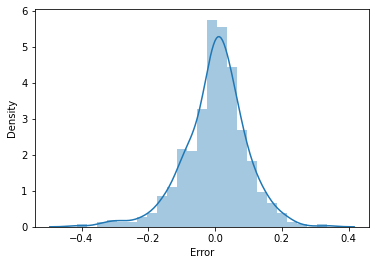

In [479]:
# Checking Normality
sns.distplot(res,bins=25)
plt.xlabel("Error")

**OBSERVATION:**
- We can see that the error terms are normally distributed which is one of the important assumptions of Linear Regression

Text(0.5, 0, 'y_pred')

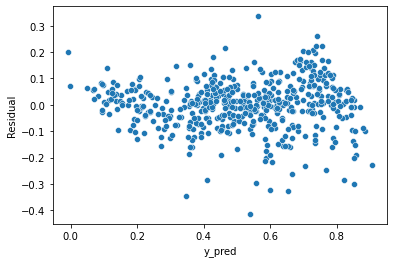

In [480]:
# Checking Independence and homoscedasticity
sns.scatterplot(y_train_pred,res)
plt.ylabel('Residual')
plt.xlabel('y_pred')

**OBSERVATION:**
- We can see that the residuals are independent of each other and also there is constant variance
- Hence our model is a good fit

### 5. PREDICTIONS

We need to transform our test set also on the same scale

In [481]:
vars = ['cnt','temp', 'atemp', 'hum' , 'windspeed']
test[vars] = scaler.transform(test[vars])
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_W2,weekday_W3,weekday_W4,weekday_W5,weekday_W6,weekday_W7,weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds,weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [482]:
# Dividing into dependent and independent variable
y_test = test.pop('cnt')
X_test = test

In [483]:
# Removing those features which we removed from train set
col = [ 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul',
       'weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds']
X_test = X_test[col]

In [484]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul',
       'weathersit_Light Snow/Rain + Thunderstorm + Scattered clouds'],
      dtype='object')

In [485]:
# Prediction on test data
X_test = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test)

#### EVALUATING TRANING & TEST SET

In [486]:
#TRAINING
r2_train = r2_score(y_train,y_train_pred)
print("R-squared of training set: ",r2_train)
mse_pred = mean_squared_error(y_train,y_train_pred)
print("MSE of training set: ",mse_pred)

R-squared of training set:  0.8248187844927313
MSE of training set:  0.008819134473718083


In [487]:
#TEST
r2_test = r2_score(y_test,y_test_pred)
print("R-squared of test set: ",r2_test)

R-squared of test set:  0.8130073757429366


In [488]:
# RMSE
mse = mean_squared_error(y_test,y_test_pred)
print("MSE of test set: ",mse)

MSE of test set:  0.008881365807231508


**OBSERVATIONS:**
- We can see that the r_square value is pretty close hence our model is performing well.

Text(0, 0.5, 'y_test_pred')

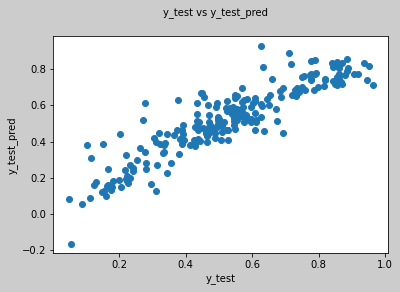

In [489]:
# Plotting y_test vs y_pred

fig = plt.figure(facecolor=('0.8'))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 10)             
plt.xlabel('y_test', fontsize = 10)                         
plt.ylabel('y_test_pred', fontsize = 10)